In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "../datos/igj-autoridades.csv"
df = pd.read_csv(path, encoding='cp1252')

def addT(target):
    # Le agrego la letra T al id de cada empresa
    # Para diferencialo del id de las personas
    return 'T' + str(target)

df.numero_correlativo = df.numero_correlativo.apply(addT)
df

,numero_correlativo,apellido_nombre,tipo_administrador,descripcion_tipo_administrador,tipo_documento,descripcion_tipo_documento,numero_documento
0,T44,"ALDAZABAL, PABLO MANUEL",A,AUTORIDAD,1,DOCUMENTO NACIONAL DE IDENTIDAD,10134086
1,T60,"ALVAREZ, HORACIO RAUL",S,SOCIO,1,DOCUMENTO NACIONAL DE IDENTIDAD,10260149
2,T60,"ALVAREZ, LUIS ENRIQUE",S,SOCIO,1,DOCUMENTO NACIONAL DE IDENTIDAD,11499344
3,T60,ALVAREZ HORACIO RAUL,A,AUTORIDAD,1,DOCUMENTO NACIONAL DE IDENTIDAD,10260149
4,T60,ALVAREZ LUIS ENRIQUE,A,AUTORIDAD,1,DOCUMENTO NACIONAL DE IDENTIDAD,11499344
5,T81,ESTHER LILIANA NAVAL,S,SOCIO,1,DOCUMENTO NACIONAL DE IDENTIDAD,16582315
6,T81,DOLORES MANUELA LADO,S,SOCIO,1,DOCUMENTO NACIONAL DE IDENTIDAD,1822142
7,T81,"FURLANO, EMILIA ADRIANA",S,SOCIO,1,DOCUMENTO NACIONAL DE IDENTIDAD,10423650
8,T81,"FURLANO,UMILDE",S,SOCIO,4,LIBRETA DE ENROLAMIENTO,4420774
9,T81,"FURLANO, ANA MARIA",S,SOCIO,1,DOCUMENTO NACIONAL DE IDENTIDAD,11224774


In [4]:
# Creo el grafo
DG = nx.DiGraph()

for i in range(df.shape[0])[:800000]:
    DG.add_edge(df.iloc[i].numero_correlativo, df.iloc[i].numero_documento)

#nx.draw(DG)
#plt.show() # display

In [5]:
# Calculo el pagerank
page_rank = nx.pagerank(DG)

# Dataframe de los pagerank
columns = ['nodo', 'valor']
df_rank = pd.DataFrame([[key, value] for key, value in page_rank.items()], columns=columns)
df_rank

,nodo,valor
0,NaN,0.000443
1,4565321,0.000123
2,20006061,0.000123
3,T109077,0.000086
4,4414528,0.000123
5,23372313,0.000111
6,T63460,0.000086
7,14564394,0.000111
8,4474206,0.000111
9,T74093,0.000086


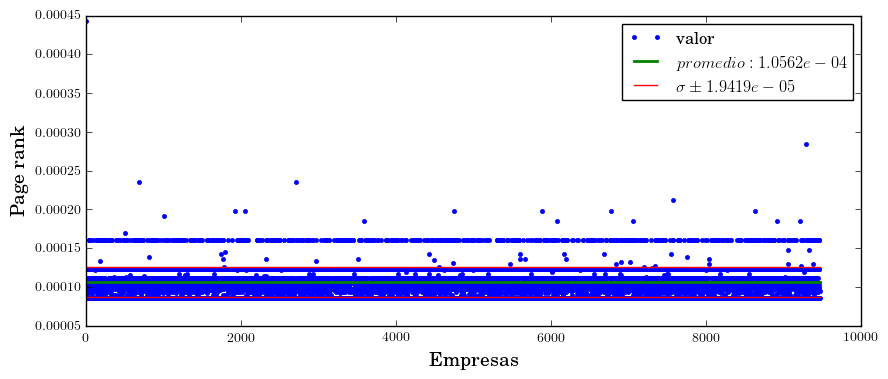

In [38]:
# Plot de los page ranks

mu1 = df_rank.valor.mean()
sigma1 = df_rank.valor.std()
x = [0, len(df_rank.valor)]

plt.figure(figsize=(10, 4))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.plot(df_rank.valor, '.')
plt.plot(x, [mu1, mu1], color="green", linewidth=2, label=r'$promedio: {0:.4e}$'.format(mu1))
plt.plot(x, [mu1+sigma1, mu1+sigma1], color="red", label=r'$\sigma \pm {0:.4e}$'.format(sigma1))
plt.plot(x, [mu1-sigma1, mu1-sigma1], color="red")

plt.legend(loc='best')
plt.ylabel('Page rank', fontsize=14)
plt.xlabel('Empresas', fontsize=14)
plt.show()

In [39]:
df_rank_filtardo = df_rank[df_rank.valor >= 0.00010]
df_rank_filtardo

,nodo,valor
0,NaN,0.000443
1,4565321,0.000123
2,20006061,0.000123
4,4414528,0.000123
5,23372313,0.000111
7,14564394,0.000111
8,4474206,0.000111
10,22468594,0.000105
13,4544772,0.000101
14,2973787,0.000111


In [42]:
df_filter = pd.concat([df[df.numero_documento.isin(df_rank_filtardo.nodo)], 
                      df[df.numero_correlativo.isin(df_rank_filtardo.nodo)]])

df_filter.to_csv("grafo_filtrado.csv", index=False)